<p style="font-size:28px;"> 4.10 TASK PART1 </p>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
path=r"D:\STUDY\CareerFoundry-DATA ANALYSTIC\Data Immersion\Achievements 4\A4_Instacart Basket Analysis"

ords_prods_customers_merge=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_aggregated.pkl'))

In [3]:
# Delete outlier
ords_prods_customers_merge.loc[ords_prods_customers_merge['prices'] >100, 'prices'] = np.nan

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
ords_prods_customers_merge.shape

(32404859, 34)

# STER2 Address PII Data

In [4]:
# Remove columns that contain personally identifiable information
ords_prods_customers_merge.drop(columns=['first_name', 'last_name'], inplace=True)

In [12]:
# Verify the results of the changes
ords_prods_customers_merge.shape

(32404859, 32)

# STEP3 Create a regional segmentation of the data

## create a “Region” column based on the “State” column

In [5]:
# Creating a region column and grouping states into Region 1 (Northeast)
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin([
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island',
    'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [6]:
# Creating a region column and grouping states into Region 2 (Midwest)
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin([
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
    'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [7]:
# Creating a region column and grouping states into Region 3 (South)
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin([
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
    'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
    'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [8]:
# Creating a region column and grouping states into Region 4 (West)
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin([
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 
    'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
    'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

 Checking the results

In [18]:
ords_prods_customers_merge.shape

(32404859, 33)

In [19]:
ords_prods_customers_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,First_Buy,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,_merge,Region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


## Determine whether there’s a difference in spending habits between the different U.S. regions.

In [10]:
df_region = ords_prods_customers_merge[['Region', 'user_id', 'spender_flag']]

In [11]:
df_region=df_region.drop_duplicates()

In [12]:
df_region_diff=pd.crosstab(df_region['Region'],df_region['spender_flag'])

In [27]:
df_region_diff

spender_flag,High_spender,Low_spender
Region,,
Midwest,1263,47256
Northeast,883,35505
South,1817,66920
West,1394,51171


In [13]:
data = {
    'Region': ['Midwest', 'Northeast', 'South', 'West'],
    'High_spender': [1263, 883, 1817, 1394],
    'Low_spender': [47256, 35505, 66920, 51171]
}
df = pd.DataFrame(data)
df.set_index('Region', inplace=True)
df['High_spender_ratio'] = df['High_spender'] / (df['High_spender'] + df['Low_spender'])

<Figure size 720x432 with 0 Axes>

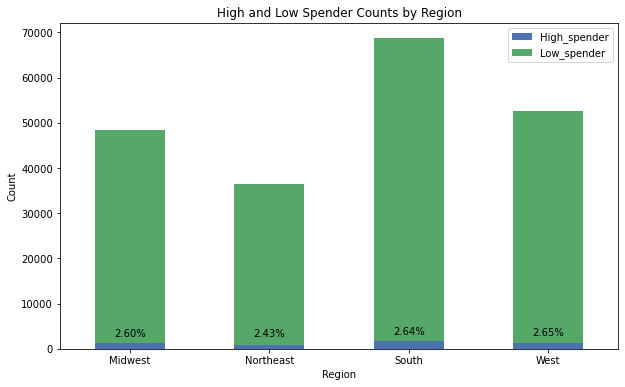

In [15]:
plt.figure(figsize=(10, 6))

bar_region_spender = df[['High_spender', 'Low_spender']].plot(kind='bar', stacked=True, color=['#4C72B0', '#55A868'], figsize=(10, 6))

plt.title('High and Low Spender Counts by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)  

for i, val in enumerate(df['High_spender_ratio']):
    bar_region_spender.annotate(f'{val:.2%}', (i, df['High_spender'][i] / 2), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

The number of users varies by region, but the proportion of 'High_spender_ratio' is almost identical across regions, indicating that spending habits are nearly the same in different regions.

# STEP4 Exclude low-activity customers

In [9]:
# creating exclusion flag column
ords_prods_customers_merge.loc[ords_prods_customers_merge['max_order']>=5, 'exclusion_flag'] = 'Included'
ords_prods_customers_merge.loc[ords_prods_customers_merge['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [34]:
# Checking the results using the "value_counts" function
ords_prods_customers_merge['exclusion_flag'].value_counts()

Included    30964564
Excluded     1440295
Name: exclusion_flag, dtype: int64

In [10]:
# Separate the subsets
excluded_customers = ords_prods_customers_merge[ords_prods_customers_merge['exclusion_flag'] == 'Excluded']
included_customers = ords_prods_customers_merge[ords_prods_customers_merge['exclusion_flag'] == 'Included']

In [36]:
# Export the excluded customers subset
excluded_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merge_EX.pkl'))

# STEP5 Create a Profiling Variable for Customers

## Creating income categories

In [38]:
included_customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [11]:
# Define users with income below the 25th percentile as low-income users.
included_customers.loc[included_customers['income'] < 67000,'income_type'] = 'low_income'

# Define users with income over the 75th percentile as high-income users.
included_customers.loc[included_customers['income'] > 128000,'income_type'] = 'high_income'

# Define other users as middle-income users.
included_customers.loc[(included_customers['income'] >= 67000) & (included_customers['income']<= 128000),'income_type'] = 'middle_income'

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Creating age categories

In [12]:
included_customers.loc[included_customers['age']< 30,'age_type'] = 'Young'
included_customers.loc[(included_customers['age'] >= 30) & (included_customers['age']< 65),'age_type'] = 'Middle'
included_customers.loc[included_customers['age']>= 65,'age_type'] = 'Senior'

## Creating family_status categories

In [13]:
included_customers.loc[included_customers['n_dependants'] == 0,'dependents_profile'] = 'single'
included_customers.loc[(included_customers['n_dependants'] > 0 ) & (included_customers['n_dependants']<=2 ),'dependents_profile'] = 'small_family'
included_customers.loc[included_customers['n_dependants']> 2,'dependents_profile'] = 'large_family'

In [54]:
included_customers['income_type'].value_counts()

middle_income    15549969
high_income       7753117
low_income        7661478
Name: income_type, dtype: int64

# STEP6 Create an appropriate visualization to show the distribution of profiles.

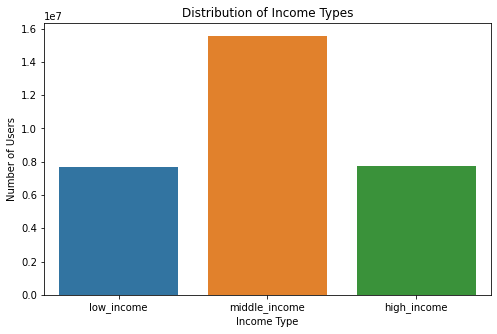

In [22]:
# Income Profile Visualization
plt.figure(figsize=(8, 5))
bar_income_type=sns.countplot(x='income_type', data=included_customers,order=['low_income', 'middle_income', 'high_income'])
plt.title('Distribution of Income Types')
plt.xlabel('Income Type')
plt.ylabel('Number of Users')
plt.show()

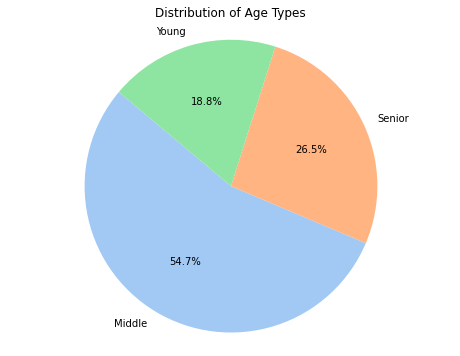

In [23]:
# Age Profile Visualization
age_counts = included_customers['age_type'].value_counts()
plt.figure(figsize=(8, 6))
pie_age=plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Age Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

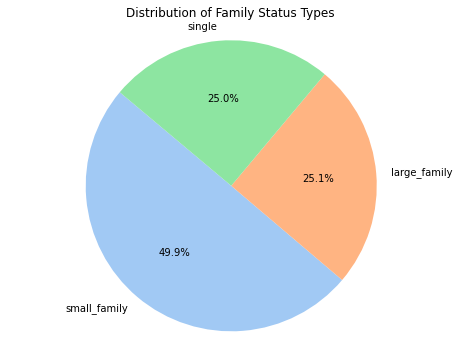

In [22]:
# Family_status Profile Visualization
family_count = included_customers['dependents_profile'].value_counts()
plt.figure(figsize=(8, 6))
pie_family=plt.pie(family_count, labels=family_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Family Status Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# STEP7 Aggregate the max, mean, and min variables on a customer-profile level 

## Age Profile

In [27]:
age_agg=included_customers.groupby('age_type').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
age_agg

order_number                prices               
                  max       mean min    max      mean  min
age_type                                                  
Middle             99  17.868445   1   25.0  7.790509  1.0
Senior             99  17.784952   1   25.0  7.796715  1.0
Young              99  17.803483   1   25.0  7.782198  1.0

## Income Profile

In [28]:
income_agg=included_customers.groupby('income_type').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
income_agg

order_number                prices               
                       max       mean min    max      mean  min
income_type                                                    
high_income             99  17.935826   1   25.0  7.950882  1.0
low_income              99  17.470500   1   25.0  7.293611  1.0
middle_income           99  17.962608   1   25.0  7.955582  1.0

## Family_status Profile

In [23]:
family_agg=included_customers.groupby('dependents_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
family_agg

order_number                prices               
                            max       mean min    max      mean  min
dependents_profile                                                  
large_family                 99  17.837412   1   25.0  7.792886  1.0
single                       99  17.957922   1   25.0  7.789550  1.0
small_family                 99  17.770497   1   25.0  7.789957  1.0

# STEP8 Compare your customer profiles with regions and departments.

## Region

### Customer Profiles Distribution

In [47]:
income_region_distribution = included_customers.groupby(['Region', 'income_type']).size().unstack(fill_value=0)

In [48]:
income_region_distribution

income_type,high_income,low_income,middle_income
Region,,,
Midwest,1843891,1770874,3646748
Northeast,1374109,1354113,2736463
South,2553484,2567492,5190163
West,1981633,1968999,3976595


In [52]:
# Normalize the data to sum to 1 (100%) across each region
income_region_distribution_percent= income_region_distribution_percent.div(income_region_distribution_percent.sum(axis=1), axis=0)
income_region_distribution_percent

income_type,high_income,low_income,middle_income
Region,,,
Midwest,0.253927,0.243871,0.502202
Northeast,0.251453,0.247793,0.500754
South,0.247643,0.249002,0.503355
West,0.249978,0.248384,0.501638


In [57]:
age_region_distribution = included_customers.groupby(['Region', 'age_type']).size().unstack(fill_value=0)

In [58]:
age_region_distribution_percent= age_region_distribution.div(age_region_distribution.sum(axis=1), axis=0)
age_region_distribution_percent

age_type,Middle,Senior,Young
Region,,,
Midwest,0.551074,0.262211,0.186716
Northeast,0.540908,0.271710,0.187382
South,0.547178,0.262673,0.190149
West,0.548977,0.264687,0.186336


In [59]:
family_region_distribution = included_customers.groupby(['Region', 'family_status']).size().unstack(fill_value=0)

In [60]:
family_region_distribution_percent= family_region_distribution.div(family_region_distribution.sum(axis=1), axis=0)
family_region_distribution_percent

family_status,single,small_family
Region,,
Midwest,0.251024,0.748976
Northeast,0.247861,0.752139
South,0.250402,0.749598
West,0.249829,0.750171


### Different behaviors

In [61]:
#Average order_number for each combination of region and income type.
income_region_order_avg = included_customers.groupby(['Region', 'income_type'])['order_number'].mean().unstack()

In [62]:
income_region_order_avg

income_type,high_income,low_income,middle_income
Region,,,
Midwest,17.849004,17.130792,17.707578
Northeast,17.880868,17.654425,18.074582
South,17.963737,17.738516,17.838612
West,18.018756,17.300057,18.281269


In [63]:
#Average prices for each combination of region and income type.
income_region_price_avg = included_customers.groupby(['Region', 'income_type'])['prices'].mean().unstack()

In [64]:
income_region_price_avg

income_type,high_income,low_income,middle_income
Region,,,
Midwest,7.940652,7.301113,7.955897
Northeast,7.952461,7.281786,7.942863
South,7.958564,7.290516,7.963029
West,7.949408,7.299034,7.954324


In [65]:
#Average order_number for each combination of region and age type.
age_region_order_avg = included_customers.groupby(['Region', 'age_type'])['order_number'].mean().unstack()

In [66]:
age_region_order_avg

age_type,Middle,Senior,Young
Region,,,
Midwest,17.774715,17.373931,17.416966
Northeast,17.648158,18.232371,18.261160
South,17.808352,17.830129,17.969289
West,18.182163,17.783004,17.620907


In [67]:
#Average prices for each combination of region and age type.
age_region_price_avg = included_customers.groupby(['Region', 'age_type'])['prices'].mean().unstack()

In [68]:
age_region_price_avg

age_type,Middle,Senior,Young
Region,,,
Midwest,7.786357,7.793276,7.808568
Northeast,7.785536,7.794631,7.750493
South,7.796650,7.798532,7.782425
West,7.789744,7.798966,7.779673


In [24]:
#Average order_number for each combination of region and family_status.
family_region_order_avg = included_customers.groupby(['Region', 'dependents_profile'])['order_number'].mean().unstack()

In [25]:
family_region_order_avg

dependents_profile,large_family,single,small_family
Region,,,
Midwest,17.322189,17.918403,17.582657
Northeast,18.109931,17.717333,17.927983
South,17.892045,17.980440,17.752704
West,18.037185,18.129485,17.858982


In [26]:
#Average prices for each combination of region and family_status.
family_region_price_avg = included_customers.groupby(['Region', 'dependents_profile'])['prices'].mean().unstack()

In [27]:
family_region_price_avg

dependents_profile,large_family,single,small_family
Region,,,
Midwest,7.801322,7.794232,7.786955
Northeast,7.789688,7.785590,7.775208
South,7.794658,7.794797,7.794150
West,7.785334,7.781107,7.797501


## Departments

### Customer Profiles Distribution

In [73]:
income_DEP_distribution = included_customers.groupby(['department_id', 'income_type']).size().unstack(fill_value=0)

In [74]:
# Normalize the data to sum to 1 (100%) across each Departments
income_DEP_distribution_percent= income_DEP_distribution.div(income_DEP_distribution.sum(axis=1), axis=0)
income_DEP_distribution_percent

income_type,high_income,low_income,middle_income
department_id,,,
1,0.255458,0.238134,0.506408
2,0.253495,0.246869,0.499637
3,0.259457,0.233544,0.506998
4,0.252582,0.231369,0.516049
5,0.284172,0.253410,0.462417
6,0.255657,0.223012,0.521331
7,0.240816,0.286575,0.472608
8,0.268375,0.232033,0.499592
9,0.259342,0.216243,0.524416


In [75]:
age_DEP_distribution = included_customers.groupby(['department_id', 'age_type']).size().unstack(fill_value=0)

In [76]:
age_DEP_distribution_percent= age_DEP_distribution.div(age_DEP_distribution.sum(axis=1), axis=0)
age_DEP_distribution_percent

age_type,Middle,Senior,Young
department_id,,,
1,0.546377,0.265939,0.187685
2,0.540786,0.259975,0.199239
3,0.548231,0.264088,0.187681
4,0.547592,0.265231,0.187177
5,0.553119,0.253708,0.193173
6,0.546746,0.262505,0.190749
7,0.548320,0.265959,0.185721
8,0.534945,0.269880,0.195175
9,0.546057,0.264331,0.189612


In [28]:
family_DEP_distribution = included_customers.groupby(['department_id', 'dependents_profile']).size().unstack(fill_value=0)

In [29]:
family_DEP_distribution_percent= family_DEP_distribution.div(family_DEP_distribution.sum(axis=1), axis=0)
family_DEP_distribution_percent

dependents_profile,large_family,single,small_family
department_id,,,
1,0.250931,0.249489,0.499580
2,0.243440,0.253233,0.503327
3,0.249657,0.251060,0.499284
4,0.251972,0.250619,0.497409
5,0.258133,0.254634,0.487233
6,0.247950,0.251810,0.500240
7,0.249204,0.250920,0.499877
8,0.248678,0.253621,0.497700
9,0.253501,0.248494,0.498005


### Different behaviors

In [79]:
#Average order_number for each combination of department and income type.
income_DEP_order_avg = included_customers.groupby(['department_id', 'income_type'])['order_number'].mean().unstack()

In [80]:
income_DEP_order_avg

income_type,high_income,low_income,middle_income
department_id,,,
1,16.418110,15.580011,16.303989
2,17.854981,17.274279,18.625254
3,18.185883,17.369823,17.912357
4,18.577096,18.215784,18.581417
5,16.429767,14.578445,16.588938
6,17.009107,16.903134,17.372063
7,18.211671,17.481964,17.997802
8,16.276837,14.905479,16.351480
9,16.818366,15.937676,16.828084


In [81]:
#Average prices for each combination of department and income type.
income_DEP_price_avg = included_customers.groupby(['department_id', 'income_type'])['prices'].mean().unstack()

In [82]:
income_DEP_price_avg

income_type,high_income,low_income,middle_income
department_id,,,
1,7.821690,7.433555,7.830503
2,7.406236,6.537104,6.946542
3,7.913851,7.537139,7.976199
4,8.085519,7.645452,8.079022
5,8.325186,7.603948,8.343096
6,7.745210,7.416753,7.758324
7,7.902003,7.169381,7.881911
8,8.016308,7.623151,7.941059
9,7.401703,7.151371,7.405134


In [83]:
#Average order_number for each combination of department and age type.
age_DEP_order_avg = included_customers.groupby(['department_id', 'age_type'])['order_number'].mean().unstack()

In [84]:
#Average prices for each combination of department and age type.
age_DEP_price_avg = included_customers.groupby(['department_id', 'age_type'])['prices'].mean().unstack()

In [30]:
#Average order_number for each combination of department and family_status.
family_DEP_order_avg = included_customers.groupby(['department_id', 'dependents_profile'])['order_number'].mean().unstack()

In [31]:
#Average price for each combination of department and family_status.
family_DEP_price_avg = included_customers.groupby(['department_id', 'dependents_profile'])['prices'].mean().unstack()

# STEP9 Chart for the key questions

## what the busiest days of the week and hours of the day

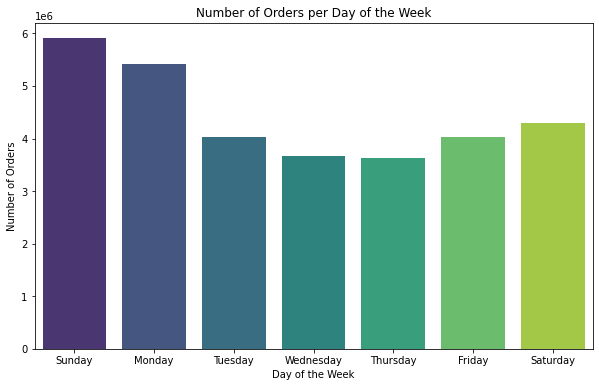

In [55]:
# Calculate the number of orders per day
orders_per_day = included_customers['orders_day_of_week'].value_counts().sort_index()

# Visualize the number of orders in a week
bar_q1_week=plt.figure(figsize=(10, 6))
sns.barplot(x=orders_per_day.index, y=orders_per_day.values, palette='viridis')
plt.title('Number of Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

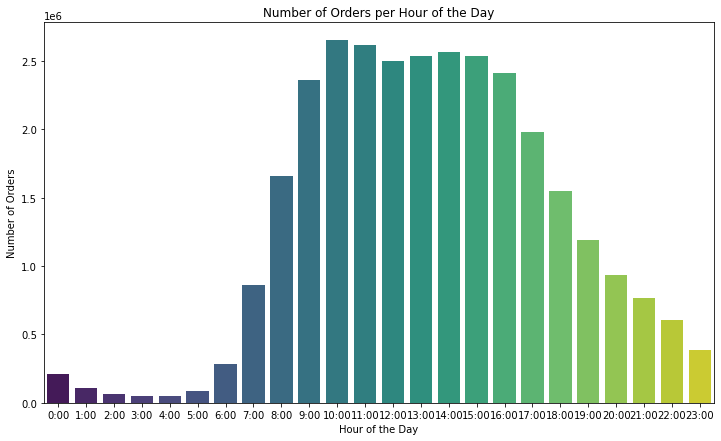

In [57]:
# Calculate the number of orders per hour
orders_per_hour = included_customers['order_hour_of_day'].value_counts().sort_index()

# Visualize the number of orders per hour of the day
c=plt.figure(figsize=(12, 7))
sns.barplot(x=orders_per_hour.index, y=orders_per_hour.values, palette='viridis')
plt.title('Number of Orders per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(24), labels=[f"{i}:00" for i in range(24)])
plt.show()


## whether there are particular times of the day when people spend the most money

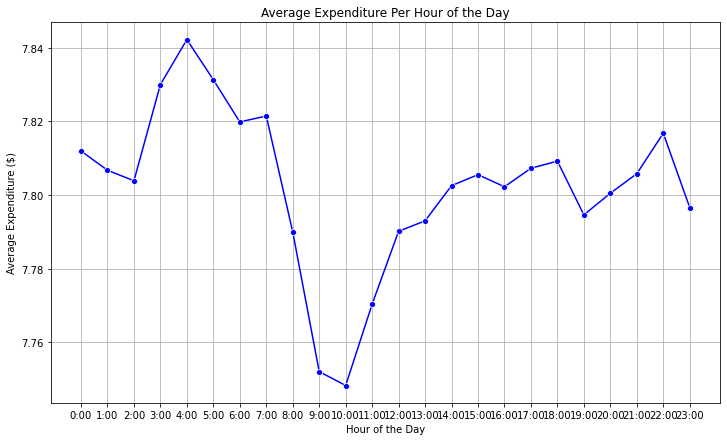

In [61]:
# Calculate the average hourly spending
average_spend_per_hour = included_customers.groupby('order_hour_of_day')['prices'].mean()

# Visualize average hourly spending
line_q2_avg=plt.figure(figsize=(12, 7))
sns.lineplot(x=average_spend_per_hour.index, y=average_spend_per_hour.values, marker='o', color='b')
plt.title('Average Expenditure Per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Expenditure ($)')
plt.grid(True)
plt.xticks(ticks=range(24), labels=[f"{i}:00" for i in range(24)])  
plt.show()

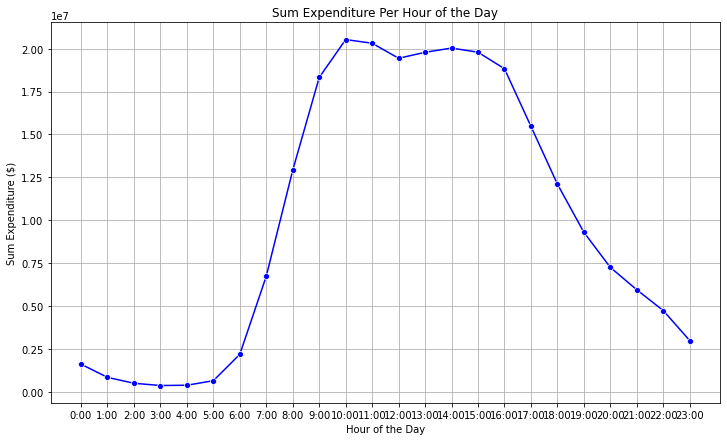

In [62]:
# Calculate the sum hourly spending
sum_spend_per_hour = included_customers.groupby('order_hour_of_day')['prices'].sum()

# Visualize sum hourly spending
line_q2_sum=plt.figure(figsize=(12, 7))
sns.lineplot(x=sum_spend_per_hour.index, y=sum_spend_per_hour.values, marker='o', color='b')
plt.title('Sum Expenditure Per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum Expenditure ($)')
plt.grid(True)
plt.xticks(ticks=range(24), labels=[f"{i}:00" for i in range(24)])  
plt.show()

## simpler price range groupings

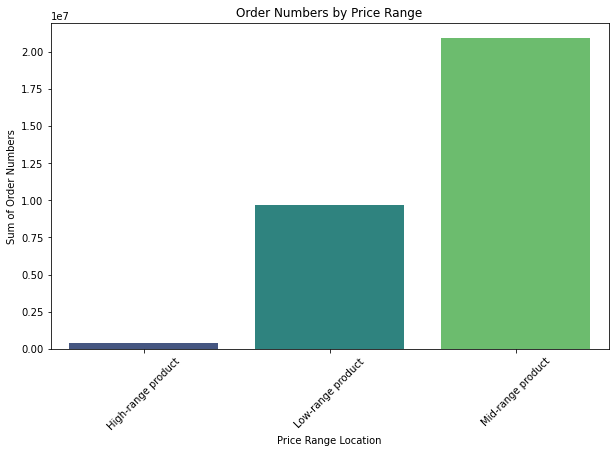

In [72]:
order_counts = included_customers['price_range_loc'].value_counts().sort_index()

bar_q3=plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')
plt.title('Order Numbers by Price Range')
plt.xlabel('Price Range Location')
plt.ylabel('Sum of Order Numbers')
plt.xticks(rotation=45)  
plt.show()

## which departments have the highest frequency of product orders.

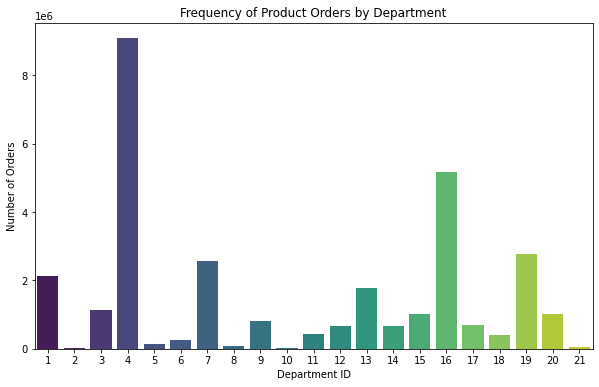

In [74]:
# Calculate the frequency of orders per department
order_frequencies = included_customers['department_id'].value_counts()

# Plotting the frequencies
bar_q4=plt.figure(figsize=(10, 6))
sns.barplot(x=order_frequencies.index, y=order_frequencies.values, palette='viridis')
plt.title('Frequency of Product Orders by Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.show()

In [16]:
order_frequencies = included_customers['department_id'].value_counts()
order_frequencies

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

## different types of customers in their system and how their ordering behaviors differ

### What’s the distribution among users in regards to their brand loyalty

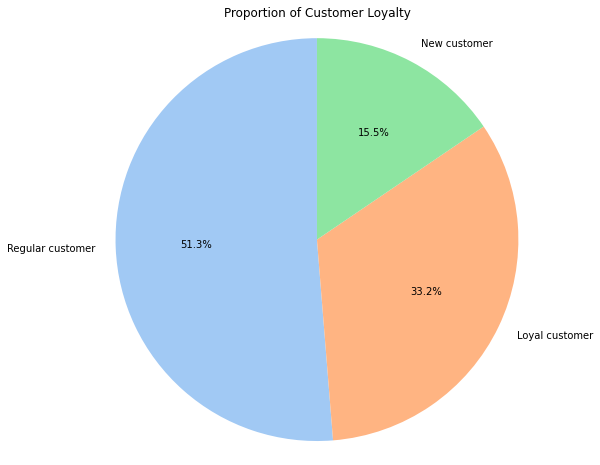

In [78]:
# Calculate the distribution of loyalty categories
loyalty_distribution =included_customers['loyalty_flag'].value_counts()

# Pie chart for loyalty distribution
pie_q5a=plt.figure(figsize=(8, 8))
plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Customer Loyalty')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
loyalty_distribution =included_customers['loyalty_flag'].value_counts()
loyalty_distribution

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

### Are there differences in ordering habits based on a customer’s loyalty status?

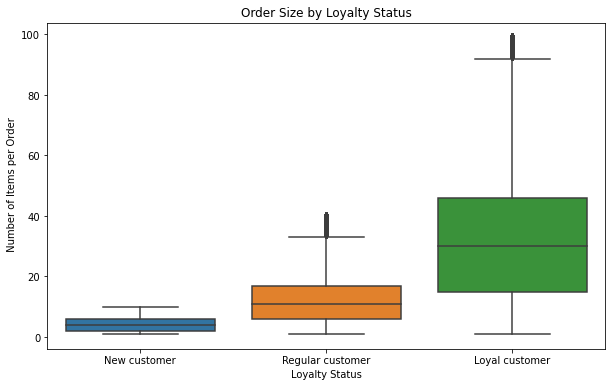

In [83]:
# Box plot for order number by loyalty status
box_q5b_order=plt.figure(figsize=(10, 6))
sns.boxplot(x='loyalty_flag', y='order_number', data=included_customers)
plt.title('Order Size by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel(' Number of Items per Order')
plt.show()

In [25]:
loyal_order_group=included_customers.groupby('loyalty_flag')['order_number'].agg(['mean', 'median'])

In [16]:
def calculate_iqr(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = group[(group < lower_bound) | (group > upper_bound)].count()
    return pd.Series([iqr, lower_bound, upper_bound, outlier_count], index=['IQR', 'Lower_Bound', 'Upper_Bound', 'Outlier_Count'])

In [32]:
loyal_order_iqr_data = included_customers.groupby('loyalty_flag')['order_number'].apply(calculate_iqr)
loyal_order_group=loyal_order_group.join( pd.DataFrame(loyal_order_iqr_data).unstack())
loyal_order_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(order_number, IQR)","(order_number, Lower_Bound)","(order_number, Upper_Bound)","(order_number, Outlier_Count)"
loyalty_flag,,,,,,
Loyal customer,32.641196,30.0,31.0,-31.5,92.5,97476.0
New customer,4.268295,4.0,4.0,-4.0,12.0,0.0
Regular customer,12.347452,11.0,11.0,-10.5,33.5,294110.0


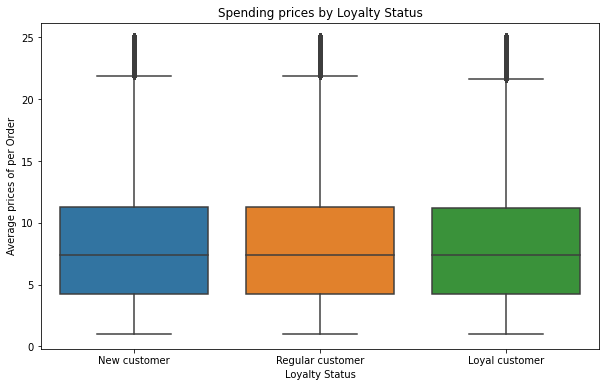

In [84]:
# Box plot for order number by loyalty status
box_q5b_price=plt.figure(figsize=(10, 6))
sns.boxplot(x='loyalty_flag', y='prices', data=included_customers)
plt.title('Spending prices by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average prices of per Order')
plt.show()

In [33]:
loyal_price_group=included_customers.groupby('loyalty_flag')['prices'].agg(['mean', 'median'])

In [34]:
loyal_price_iqr_data = included_customers.groupby('loyalty_flag')['prices'].apply(calculate_iqr)
loyal_price_group=loyal_price_group.join( pd.DataFrame(loyal_price_iqr_data).unstack())
loyal_price_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(prices, IQR)","(prices, Lower_Bound)","(prices, Upper_Bound)","(prices, Outlier_Count)"
loyalty_flag,,,,,,
Loyal customer,7.773575,7.4,7.0,-6.30,21.70,43408.0
New customer,7.801665,7.4,7.1,-6.45,21.95,23678.0
Regular customer,7.798262,7.4,7.1,-6.45,21.95,77747.0


### Are there differences in ordering habits based on a customer’s region?


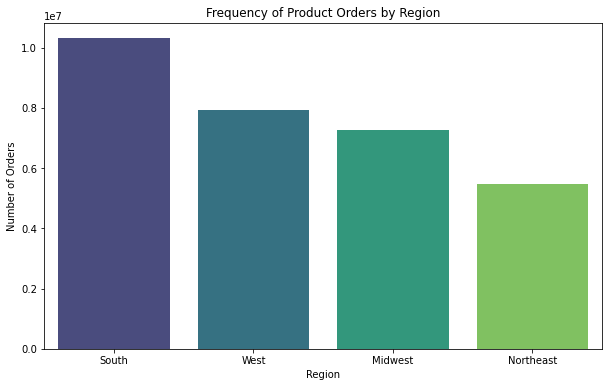

In [89]:

region_frequencies = included_customers['Region'].value_counts()

# Plotting the frequencies
bar_q5c=plt.figure(figsize=(10, 6))
sns.barplot(x=region_frequencies.index, y=region_frequencies.values, palette='viridis')
plt.title('Frequency of Product Orders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()

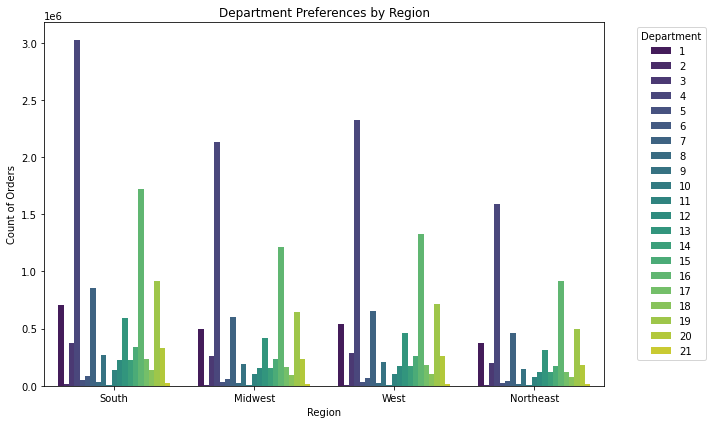

In [95]:
# Orders by departments for each region
bar_q5c_department_regions = plt.figure(figsize=(10, 6))
sns.countplot(data=included_customers, x='Region', hue='department_id', palette='viridis')
plt.title('Department Preferences by Region')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [40]:
region_department_counts = included_customers.groupby(['Region', 'department_id']).size().reset_index(name='count')
region_department_counts

,Region,department_id,count
0,Midwest,1,498225
1,Midwest,2,7983
2,Midwest,3,261753
3,Midwest,4,2134115
4,Midwest,5,34043
5,Midwest,6,60666
6,Midwest,7,598979
7,Midwest,8,21358
8,Midwest,9,193463
9,Midwest,10,7929


### What different classifications does the demographic information suggest? What differences can you find in ordering habits of different customer profiles?

Age-type

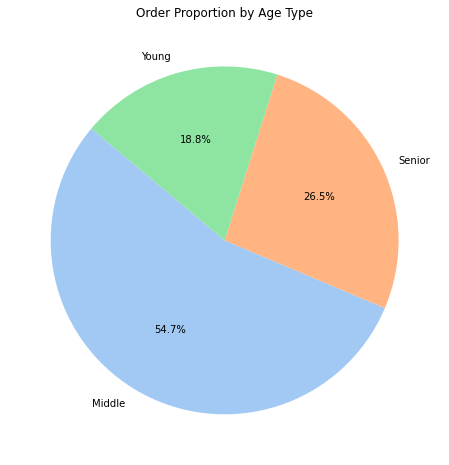

In [15]:
#  Count the number of orders for each age type
age_type_counts = included_customers['age_type'].value_counts()

# The pie chart represents the percentage of the number of orders by age type
pie_q5d_age=plt.figure(figsize=(8, 8))
plt.pie(age_type_counts, labels=age_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Order Proportion by Age Type')
plt.show()

In [16]:
#Prepare data, including overall price data and price data by age
df_age=included_customers[['age_type', 'prices']]
df_age['age_type_general'] = 'Overall'
combined_data = pd.concat([
    df_age[['age_type', 'prices']].rename(columns={'age_type': 'Category'}),
    df_age[['age_type_general', 'prices']].rename(columns={'age_type_general': 'Category'})
])

C:\Users\chenh\AppData\Local\Temp/ipykernel_25908/4254966326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age_type_general'] = 'Overall'


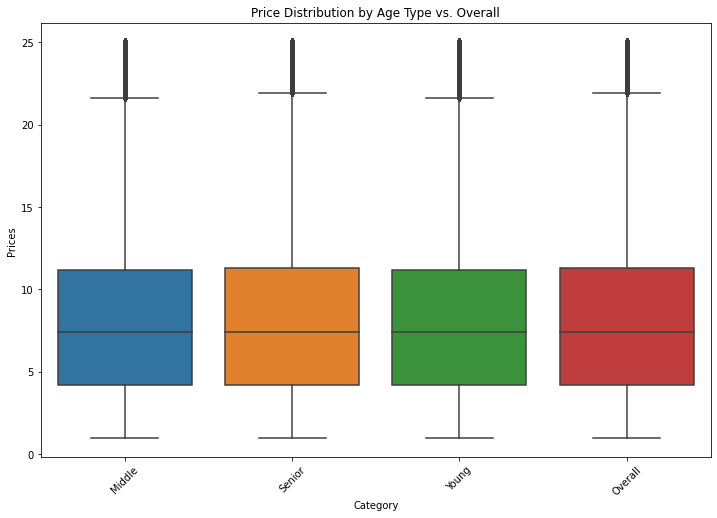

In [17]:
#Draw a consolidated box plot
box_q5d_age=plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='prices', data=combined_data)
plt.title('Price Distribution by Age Type vs. Overall')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.xticks(rotation=45) 
plt.show()

In [17]:
age_price_group=included_customers.groupby('age_type')['prices'].agg(['mean', 'median'])

In [18]:
age_price_iqr_data = included_customers.groupby('age_type')['prices'].apply(calculate_iqr)
age_price_group=age_price_group.join( pd.DataFrame(age_price_iqr_data).unstack())
age_price_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(prices, IQR)","(prices, Lower_Bound)","(prices, Upper_Bound)","(prices, Outlier_Count)"
age_type,,,,,,
Middle,7.790509,7.4,7.0,-6.30,21.70,80023.0
Senior,7.796715,7.4,7.1,-6.45,21.95,39060.0
Young,7.782198,7.4,7.0,-6.30,21.70,27512.0


In [18]:
#Prepare data, including overall frequency data and frequency data by age
df_age_f=included_customers[['age_type', 'Customer_frequency']]
df_age_f['age_type_general'] = 'Overall'
combined_data_af = pd.concat([
    df_age_f[['age_type', 'Customer_frequency']].rename(columns={'age_type': 'Category'}),
    df_age_f[['age_type_general', 'Customer_frequency']].rename(columns={'age_type_general': 'Category'})
])

C:\Users\chenh\AppData\Local\Temp/ipykernel_25908/983447209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_f['age_type_general'] = 'Overall'


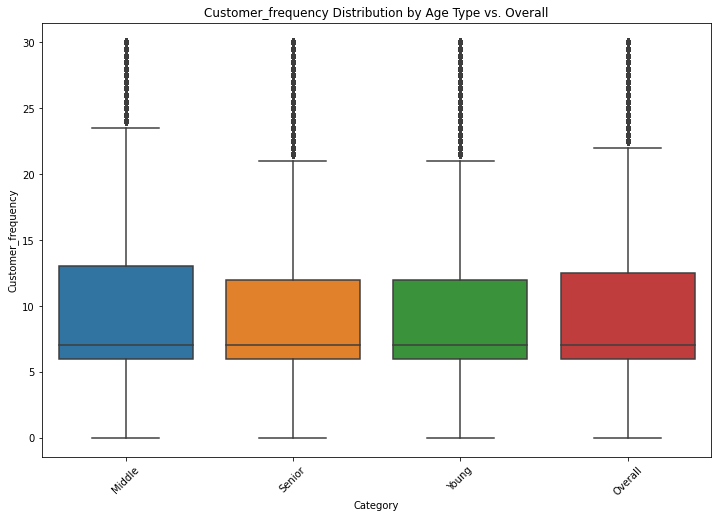

In [19]:
#Draw a consolidated box plot
box_q5d_age_f=plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Customer_frequency', data=combined_data_af)
plt.title('Customer_frequency Distribution by Age Type vs. Overall')
plt.xlabel('Category')
plt.ylabel('Customer_frequency')
plt.xticks(rotation=45) 
plt.show()

In [19]:
age_frequency_group=included_customers.groupby('age_type')['Customer_frequency'].agg(['mean', 'median'])

In [20]:
age_frequency_iqr_data = included_customers.groupby('age_type')['Customer_frequency'].apply(calculate_iqr)
age_frequency_group=age_frequency_group.join( pd.DataFrame(age_frequency_iqr_data).unstack())
age_frequency_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(Customer_frequency, IQR)","(Customer_frequency, Lower_Bound)","(Customer_frequency, Upper_Bound)","(Customer_frequency, Outlier_Count)"
age_type,,,,,,
Middle,9.973800,7.0,7.0,-4.5,23.5,1135193.0
Senior,9.933025,7.0,6.0,-3.0,21.0,660216.0
Young,9.942566,7.0,6.0,-3.0,21.0,463468.0


In [21]:
#To explore the propensity of different age gcroups to consume different department.
#Data preparation
df_age_dep=included_customers[['age_type', 'department_id']]

overall_counts = df_age_dep['department_id'].value_counts(normalize=True)
age_counts = df_age_dep.pivot_table(index='department_id', columns='age_type', aggfunc='size', fill_value=0)
df_age_dep_proportions = age_counts.divide(age_counts.sum()).fillna(0)

df_age_dep_proportions['Overall'] = overall_counts
df_age_dep_proportions = df_age_dep_proportions[['Overall', 'Young', 'Middle', 'Senior']]

In [22]:
df_age_dep_proportions

age_type,Overall,Young,Middle,Senior
department_id,,,,
1,0.068521,0.068450,0.068387,0.068848
2,0.001111,0.001178,0.001098,0.001092
3,0.036197,0.036159,0.036249,0.036117
4,0.293215,0.292119,0.293293,0.293831
5,0.004671,0.004802,0.004719,0.004477
6,0.008267,0.008393,0.008257,0.008199
7,0.083059,0.082105,0.083192,0.083462
8,0.003005,0.003122,0.002937,0.003064
9,0.026551,0.026796,0.026484,0.026516


In [24]:
difference = df_age_dep_proportions.subtract(df_age_dep_proportions['Overall'], axis=0)

In [25]:
difference

age_type,Overall,Young,Middle,Senior
department_id,,,,
1,0.0,-0.000071,-0.000134,0.000327
2,0.0,0.000067,-0.000014,-0.000020
3,0.0,-0.000038,0.000052,-0.000080
4,0.0,-0.001096,0.000078,0.000616
5,0.0,0.000132,0.000048,-0.000194
6,0.0,0.000126,-0.000011,-0.000068
7,0.0,-0.000954,0.000133,0.000403
8,0.0,0.000117,-0.000069,0.000059
9,0.0,0.000245,-0.000067,-0.000035


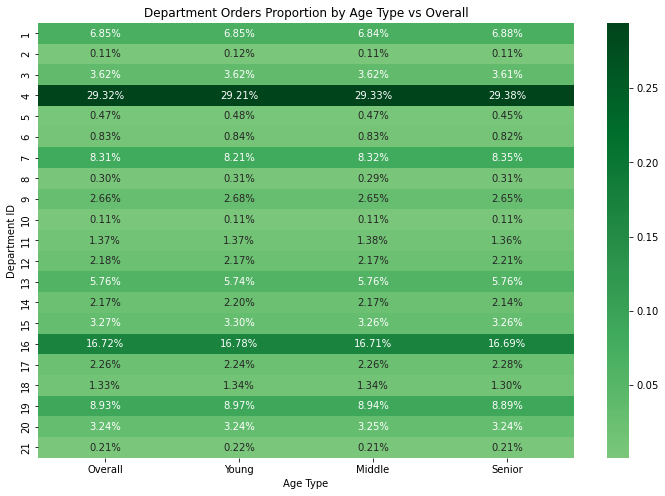

In [40]:
heat_age_dep=plt.figure(figsize=(12, 8))
sns.heatmap(df_age_dep_proportions, annot=True, cmap='Greens', center=0.01, fmt=".2%")
plt.title('Department Orders Proportion by Age Type vs Overall')
plt.xlabel('Age Type')
plt.ylabel('Department ID')
plt.show()

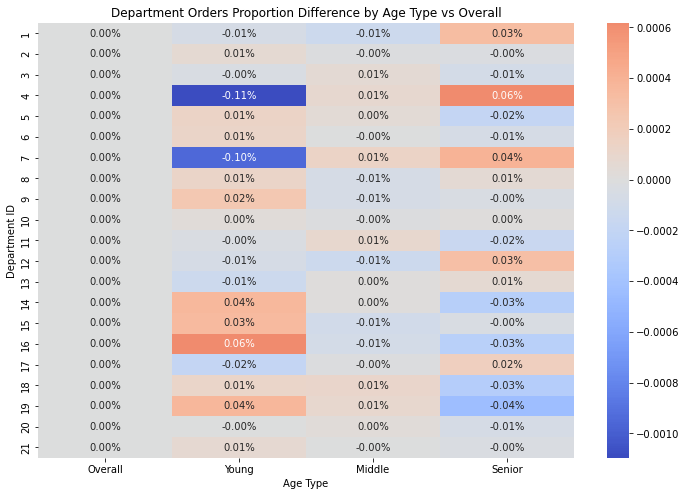

In [37]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["blue", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom_blue_red_white", colors, N=256)

heat_age_dep_d=plt.figure(figsize=(12, 8))
sns.heatmap(difference, annot=True, cmap='coolwarm', center=0.00, fmt=".2%")
plt.title('Department Orders Proportion Difference by Age Type vs Overall')
plt.xlabel('Age Type')
plt.ylabel('Department ID')
plt.show()

Income-type

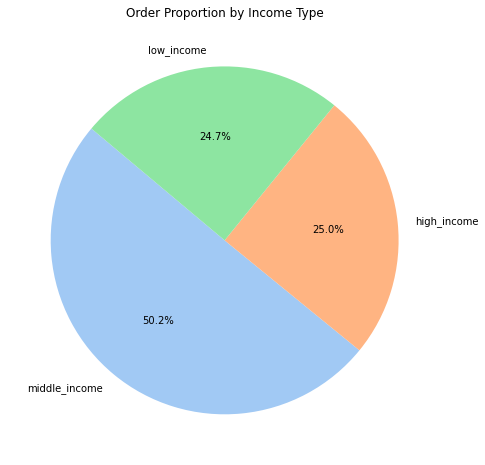

In [42]:
#  Count the number of orders for each income type
income_type_counts = included_customers['income_type'].value_counts()

# The pie chart represents the percentage of the number of orders by age type
pie_q5d_income=plt.figure(figsize=(8, 8))
plt.pie(income_type_counts, labels=income_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Order Proportion by Income Type')
plt.show()

In [24]:
included_customers['income_type'].value_counts()

middle_income    15549969
high_income       7753117
low_income        7661478
Name: income_type, dtype: int64

In [44]:
#Prepare data, including overall price data and price data by income
df_income=included_customers[['income_type', 'prices']]
df_income['income_type_general'] = 'Overall'
combined_data_income = pd.concat([
    df_income[['income_type', 'prices']].rename(columns={'income_type': 'Category'}),
    df_income[['income_type_general', 'prices']].rename(columns={'income_type_general': 'Category'})
])

C:\Users\chenh\AppData\Local\Temp/ipykernel_25908/3763676829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income['income_type_general'] = 'Overall'


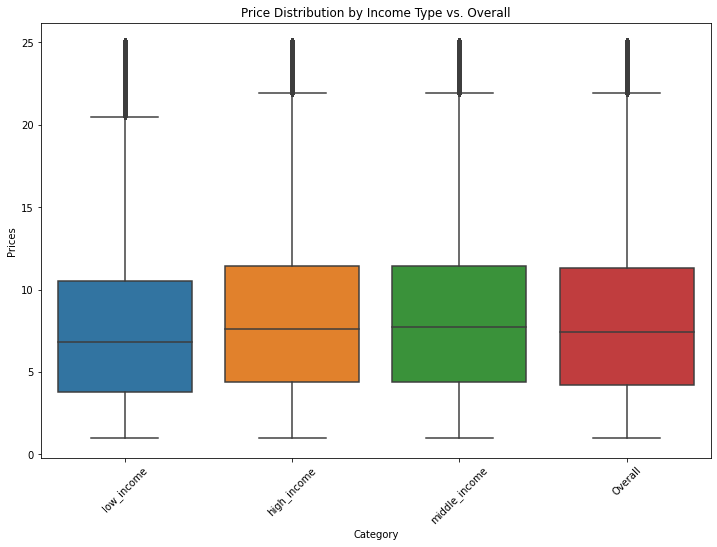

In [45]:
#Draw a consolidated box plot
box_q5d_income=plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='prices', data=combined_data_income)
plt.title('Price Distribution by Income Type vs. Overall')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.xticks(rotation=45) 
plt.show()

In [26]:
income_price_group=included_customers.groupby('income_type')['prices'].agg(['mean', 'median'])
income_price_iqr_data = included_customers.groupby('income_type')['prices'].apply(calculate_iqr)
income_price_group=income_price_group.join( pd.DataFrame(income_price_iqr_data).unstack())
income_price_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(prices, IQR)","(prices, Lower_Bound)","(prices, Upper_Bound)","(prices, Outlier_Count)"
income_type,,,,,,
high_income,7.950882,7.6,7.0,-6.10,21.90,39849.0
low_income,7.293611,6.8,6.7,-6.25,20.55,36509.0
middle_income,7.955582,7.7,7.0,-6.10,21.90,78878.0


In [46]:
#Prepare data, including overall frequency data and frequency data by income
df_income_f=included_customers[['income_type', 'Customer_frequency']]
df_income_f['income_type_general'] = 'Overall'
combined_data_if = pd.concat([
    df_income_f[['income_type', 'Customer_frequency']].rename(columns={'income_type': 'Category'}),
    df_income_f[['income_type_general', 'Customer_frequency']].rename(columns={'income_type_general': 'Category'})
])

C:\Users\chenh\AppData\Local\Temp/ipykernel_25908/2409644085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_f['income_type_general'] = 'Overall'


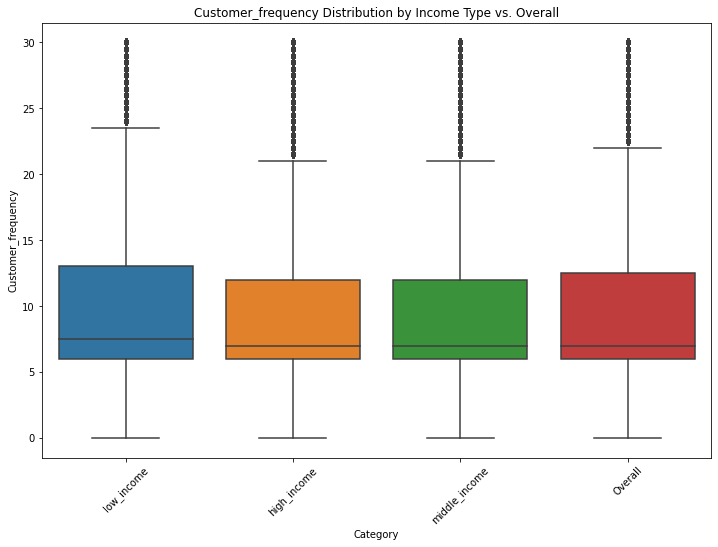

In [47]:
#Draw a consolidated box plot
box_q5d_income_f=plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Customer_frequency', data=combined_data_if)
plt.title('Customer_frequency Distribution by Income Type vs. Overall')
plt.xlabel('Category')
plt.ylabel('Customer_frequency')
plt.xticks(rotation=45) 
plt.show()

In [27]:
income_frequency_group=included_customers.groupby('income_type')['Customer_frequency'].agg(['mean', 'median'])

In [28]:
income_frequency_iqr_data = included_customers.groupby('income_type')['Customer_frequency'].apply(calculate_iqr)
income_frequency_group=income_frequency_group.join( pd.DataFrame(income_frequency_iqr_data).unstack())
income_frequency_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(Customer_frequency, IQR)","(Customer_frequency, Lower_Bound)","(Customer_frequency, Upper_Bound)","(Customer_frequency, Outlier_Count)"
income_type,,,,,,
high_income,9.869282,7.0,6.0,-3.0,21.0,601392.0
low_income,10.200764,7.5,7.0,-4.5,23.5,556175.0
middle_income,9.880912,7.0,6.0,-3.0,21.0,1218972.0


In [29]:
#To explore the propensity of different income gcroups to consume different department.
#Data preparation
df_income_dep=included_customers[['income_type', 'department_id']]

overall_counts_i = df_income_dep['department_id'].value_counts(normalize=True)
income_counts = df_income_dep.pivot_table(index='department_id', columns='income_type', aggfunc='size', fill_value=0)
df_income_dep_proportions = income_counts.divide(income_counts.sum()).fillna(0)

df_income_dep_proportions['Overall'] = overall_counts_i
df_income_dep_proportions = df_income_dep_proportions[['Overall', 'low_income', 'middle_income', 'high_income']]

In [30]:
df_income_dep_proportions

income_type,Overall,low_income,middle_income,high_income
department_id,,,,
1,0.068521,0.065948,0.069097,0.069909
2,0.001111,0.001109,0.001106,0.001125
3,0.036197,0.034166,0.036544,0.037508
4,0.293215,0.274185,0.301309,0.295786
5,0.004671,0.004784,0.004301,0.005301
6,0.008267,0.007451,0.008582,0.008441
7,0.083059,0.096201,0.078167,0.079885
8,0.003005,0.002818,0.002990,0.003221
9,0.026551,0.023205,0.027726,0.027500


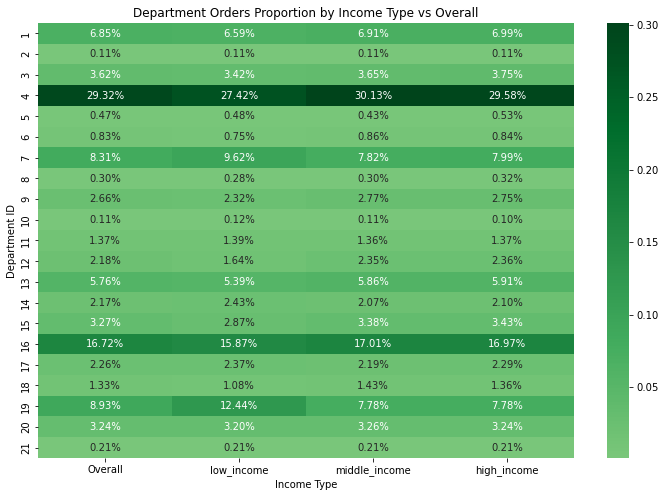

In [71]:
heat_income_dep=plt.figure(figsize=(12, 8))
sns.heatmap(df_income_dep_proportions, annot=True, cmap='Greens', center=0.01, fmt=".2%")
plt.title('Department Orders Proportion by Income Type vs Overall')
plt.xlabel('Income Type')
plt.ylabel('Department ID')
plt.show()

In [55]:
difference_i = df_income_dep_proportions.subtract(df_income_dep_proportions['Overall'], axis=0)

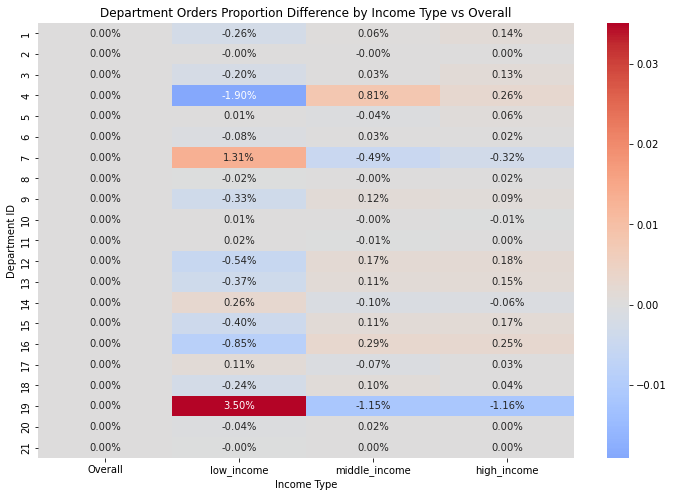

In [56]:
colors = ["blue", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom_blue_red_white", colors, N=256)

heat_income_dep_d=plt.figure(figsize=(12, 8))
sns.heatmap(difference_i, annot=True, cmap='coolwarm', center=0.00, fmt=".2%")
plt.title('Department Orders Proportion Difference by Income Type vs Overall')
plt.xlabel('Income Type')
plt.ylabel('Department ID')
plt.show()

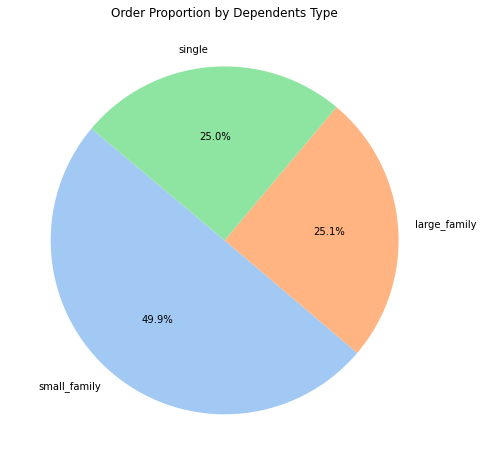

In [62]:
#  Count the number of orders for each dependents type
dependents_type_counts = included_customers['dependents_profile'].value_counts()

# The pie chart represents the percentage of the number of orders by dependents type
pie_q5d_dependents=plt.figure(figsize=(8, 8))
plt.pie(dependents_type_counts, labels=dependents_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Order Proportion by Dependents Type')
plt.show()

In [31]:
included_customers['dependents_profile'].value_counts()

small_family    15452367
large_family     7772516
single           7739681
Name: dependents_profile, dtype: int64

In [63]:
#Prepare data, including overall prices data and price data by dependents
df_dependents =included_customers[['dependents_profile', 'prices']]
df_dependents['dependents_type_general'] = 'Overall'
combined_data_dependents = pd.concat([
    df_dependents[['dependents_profile', 'prices']].rename(columns={'dependents_profile': 'Category'}),
    df_dependents[['dependents_type_general', 'prices']].rename(columns={'dependents_type_general': 'Category'})
])

C:\Users\chenh\AppData\Local\Temp/ipykernel_25908/1706871396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dependents['dependents_type_general'] = 'Overall'


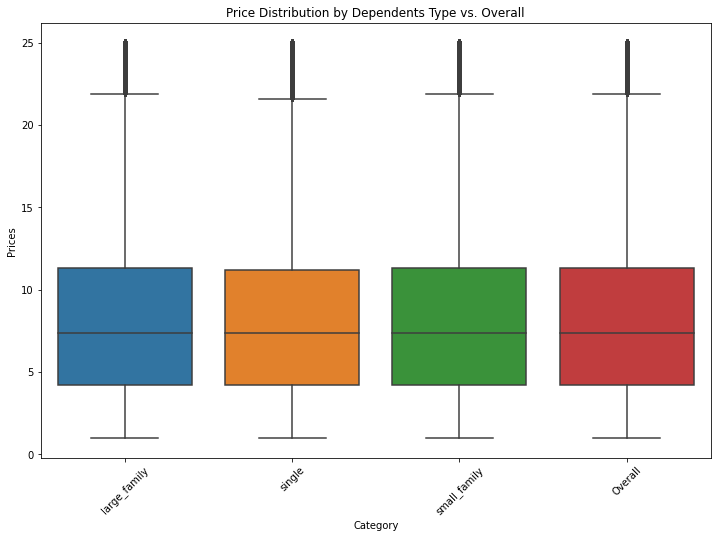

In [64]:
#Draw a consolidated box plot
box_q5d_dependents =plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='prices', data=combined_data_dependents)
plt.title('Price Distribution by Dependents Type vs. Overall')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.xticks(rotation=45) 
plt.show()

In [32]:
fam_price_group=included_customers.groupby('dependents_profile')['prices'].agg(['mean', 'median'])
fam_price_iqr_data = included_customers.groupby('dependents_profile')['prices'].apply(calculate_iqr)
fam_price_group=fam_price_group.join( pd.DataFrame(fam_price_iqr_data).unstack())
fam_price_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(prices, IQR)","(prices, Lower_Bound)","(prices, Upper_Bound)","(prices, Outlier_Count)"
dependents_profile,,,,,,
large_family,7.792886,7.4,7.1,-6.45,21.95,36277.0
single,7.789550,7.4,7.0,-6.30,21.70,35699.0
small_family,7.789957,7.4,7.1,-6.45,21.95,72858.0


In [66]:
#Prepare data, including overall frequency data and frequency data by dependents
df_dependents_f=included_customers[['dependents_profile', 'Customer_frequency']]
df_dependents_f['dependents_type_general'] = 'Overall'
combined_data_df = pd.concat([
    df_dependents_f[['dependents_profile', 'Customer_frequency']].rename(columns={'dependents_profile': 'Category'}),
    df_dependents_f[['dependents_type_general', 'Customer_frequency']].rename(columns={'dependents_type_general': 'Category'})
])

C:\Users\chenh\AppData\Local\Temp/ipykernel_25908/1627606779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dependents_f['dependents_type_general'] = 'Overall'


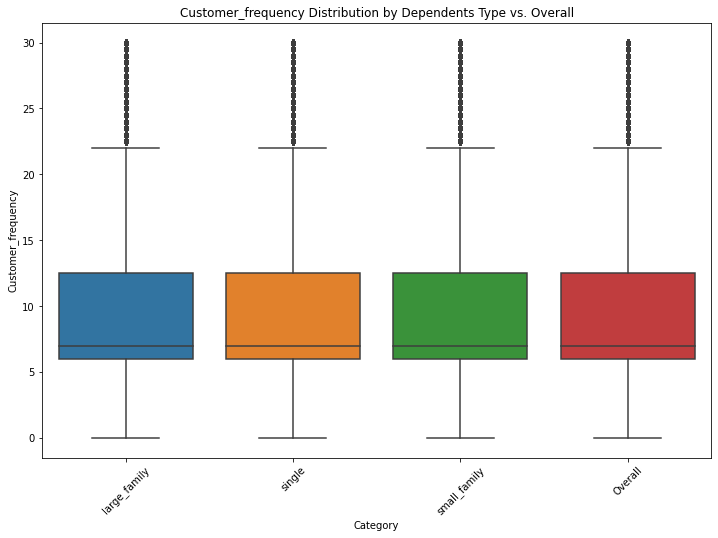

In [67]:
#Draw a consolidated box plot
box_q5d_dependents_f=plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Customer_frequency', data=combined_data_df)
plt.title('Customer_frequency Distribution by Dependents Type vs. Overall')
plt.xlabel('Category')
plt.ylabel('Customer_frequency')
plt.xticks(rotation=45) 
plt.show()

In [33]:
fam_frequency_group=included_customers.groupby('dependents_profile')['Customer_frequency'].agg(['mean', 'median'])
fam_frequency_iqr_data = included_customers.groupby('dependents_profile')['Customer_frequency'].apply(calculate_iqr)
fam_frequency_group=fam_frequency_group.join( pd.DataFrame(fam_frequency_iqr_data).unstack())
fam_frequency_group

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,mean,median,"(Customer_frequency, IQR)","(Customer_frequency, Lower_Bound)","(Customer_frequency, Upper_Bound)","(Customer_frequency, Outlier_Count)"
dependents_profile,,,,,,
large_family,9.949826,7.0,6.5,-3.75,22.25,562506.0
single,9.936569,7.0,6.5,-3.75,22.25,556332.0
small_family,9.971122,7.0,6.5,-3.75,22.25,1135029.0


In [73]:
#To explore the propensity of different income gcroups to consume different department.
#Data preparation
df_dependents_dep=included_customers[['dependents_profile', 'department_id']]

overall_counts_d = df_dependents_dep['department_id'].value_counts(normalize=True)
dependents_counts = df_dependents_dep.pivot_table(index='department_id', columns='dependents_profile', aggfunc='size', fill_value=0)
df_dependents_dep_proportions = dependents_counts.divide(dependents_counts.sum()).fillna(0)

df_dependents_dep_proportions['Overall'] = overall_counts_d
df_dependents_dep_proportions = df_dependents_dep_proportions[['Overall', 'single', 'small_family', 'large_family']]

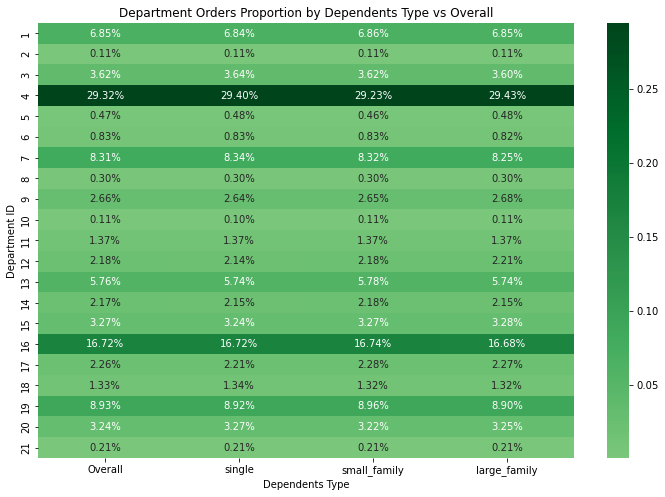

In [74]:
heat_dependents_dep=plt.figure(figsize=(12, 8))
sns.heatmap(df_dependents_dep_proportions, annot=True, cmap='Greens', center=0.01, fmt=".2%")
plt.title('Department Orders Proportion by Dependents Type vs Overall')
plt.xlabel('Dependents Type')
plt.ylabel('Department ID')
plt.show()

In [75]:
difference_d = df_dependents_dep_proportions.subtract(df_dependents_dep_proportions['Overall'], axis=0)

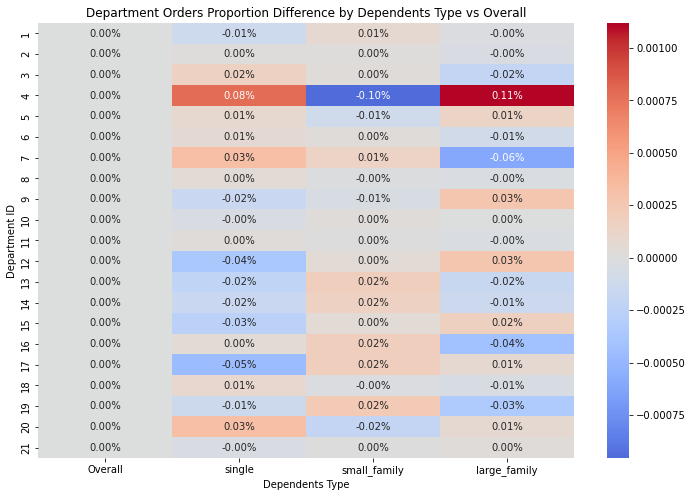

In [76]:
colors = ["blue", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom_blue_red_white", colors, N=256)

heat_dependents_dep_d=plt.figure(figsize=(12, 8))
sns.heatmap(difference_d, annot=True, cmap='coolwarm', center=0.00, fmt=".2%")
plt.title('Department Orders Proportion Difference by Dependents Type vs Overall')
plt.xlabel('Dependents Type')
plt.ylabel('Department ID')
plt.show()

In [14]:
included_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,First_Buy,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,_merge,Region,exclusion_flag,income_type,age_type,dependents_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Included,low_income,Middle,large_family
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Included,low_income,Middle,large_family
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Included,low_income,Middle,large_family
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Included,low_income,Middle,large_family
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Included,low_income,Middle,large_family


In [16]:
aeg_fam_distribution = included_customers.groupby(['age_type', 'family_status']).size().unstack(fill_value=0)
aeg_fam_distribution

family_status,divorced/widowed,living with parents and siblings,married,single
age_type,,,,
Middle,623313,0,12681312,3646792
Senior,2021958,0,6173586,0
Young,0,1481172,2888813,1447618


In [17]:
from scipy.stats import chi2_contingency

# 卡方检验
chi2, p, dof, expected = chi2_contingency(aeg_fam_distribution)
print(f'Chi-squared: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared: 12160019.331269195
p-value: 0.0
Degrees of freedom: 6
Expected frequencies:
[[ 1448142.19890217   810861.22254859 11903500.79815388  2788912.78039536]
 [  700136.93305754   392029.1045457   5755015.3208611   1348362.64153566]
 [  496991.86804029   278281.67290571  4085194.88098502   957134.57806898]]


# Export all visualizations

In [56]:
bar_q1_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_q1_week.png'))

In [58]:
bar_q1_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_q1_day.png'))

In [63]:
line_q2_avg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_q2_avg.png'))

In [64]:
line_q2_sum.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_q2_sum.png'))

In [73]:
bar_q3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_q3.png'))

In [75]:
bar_q4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_q4.png'))

In [79]:
pie_q5a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_q5a.png'))

In [85]:
box_q5b_order.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5b_order.png'))

In [86]:
box_q5b_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5b_price.png'))

In [96]:
bar_q5c.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_q5c.png'))

In [97]:
bar_q5c_department_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_q5c_department_regions.png'))

In [29]:
pie_q5d_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_q5d_age.png'))

In [30]:
box_q5d_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5d_age.png'))

In [31]:
box_q5d_age_f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5d_age_f.png'))

In [41]:
heat_age_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heat_age_dep.png'))

In [39]:
heat_age_dep_d.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heat_age_dep_d.png'))

In [57]:
pie_q5d_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_q5d_income.png'))

In [58]:
box_q5d_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5d_income.png'))

In [59]:
box_q5d_income_f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5d_income_f.png'))

In [60]:
heat_income_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heat_income_dep.png'))

In [61]:
heat_income_dep_d.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heat_income_dep_d.png'))

In [77]:
pie_q5d_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_q5d_dependents.png'))

In [78]:
box_q5d_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5d_dependents.png'))

In [79]:
box_q5d_dependents_f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_q5d_dependents_f.png'))

In [80]:
heat_dependents_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heat_dependents_dep.png'))

In [81]:
heat_dependents_dep_d.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heat_dependents_dep_d.png'))